### Hector Daniel Juarez Leonel
# DBSCAN

Density-Based Spatial Clustering of Applications with Noise.

A diferencia de los algoritmos de k-means o agrupamiento jerárquico, DBSCAN permite tener puntos sin clasificar, pues solo aquellos puntos más cercanos al vecindario pertenecerán al cluster.

Algoritmo:

<ol>
    <li>Dado un número de puntos no visitados n, recorrer los puntos con un loop y marcarlos como visitados</li>
    <li>Desde cada punto, calcular la distancia para cada otro punto en el dataset</li>
    <li>Para todos los puntos que calleron dentro del radio del vecindario dado como hiperparámetro, conectar todos los vecinos</li>
    <li>Revisar si el número de vecinos es cumple con el mínimo de puntos requerido</li>
    <li>Si se alcanza el minimo número de puntos, agruparlos como un cluster, si no, marcar el punto como ruido</li>
    <li>Repetir hasta que todos los puntos sean categorizados como agrupados o como ruido</li>
</ol>

A continuación se muestra un ejemplo donde se implementa el algoritmo desde cero

In [1]:
"""
Importación de librerias para la creación de datos de prueba (make_blobs), 
graficar (matplotlib) y manejo de arreglos (numpy).
"""
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#Se crea un dataset con 500 muestras y 4 clusters, con 2 caracteristicas para poder visualizarlo
#en un plano 2D.
X_blob, y_blob = make_blobs(n_samples=500, centers=4, n_features=2, random_state=800)

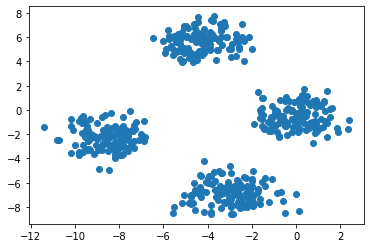

In [2]:
plt.scatter(X_blob[:,0], X_blob[:,1])
plt.show()

In [3]:
#Funcion que realiza el dbscan desde cero
def scratch_DBSCAN(x, eps, min_pts):
    """
    x: dataset de entrada
    eps: el radio mínimo para hacer el vecindario
    min_pts: número de puntos mínimos para hacer el cluster
    """
    
    # Crea un arreglo del tamaño de datos de entrada para poder etiquetar a los puntos 
    #y lo inicializa con ceros
    labels = [0]* x.shape[0]

    # Inicio arbitrario del ID del "Cluster actual" 
    C = 0

    #For que recorre cada punto p en X
    for p in range(0, x.shape[0]):
    
        # Solamente los nodos no visitados pueden ser evaluados como centros de vecindario
        if not (labels[p] == 0):
            continue #continua con el siguiente punto p
        
        # Encuentra todos los puntos p vecinos con ayuda de otra función
        neighbors = neighborhood_search(x, p, eps)
        
        # Si no hay suficientes puntos vecinos, se clasifica el punto como ruido (label=-1)
        # De lo contrario, se puede usar este punto como un cluster
        if len(neighbors) < min_pts:
            labels[p] = -1 #clasifica el punto como ruido   
        else: 
            C += 1 #clasifica el punto como cluster de vecindario
            neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts) #asigna los puntos vecinos al cluster
    
    return labels #retorna las etiquetas


#Agrupamiento de vecinos
def neighbor_cluster(x, labels, p, neighbors, C, eps, min_pts):
    """
    x: recibe el dataset, 
    labels: las etiquetas (python maneja el paso de parametros por referencia, por lo que las moficiaciones
            hechas aqui, se aplican a la variable original).
    p: el punto origen del cluster
    neighbors: los puntos vecinos
    C: El id del cluster
    eps: el radio minimo
    min_pts: el número de puntos mínimos
    """

    # Asigna el ID del cluster a la etiqueta del punto p
    labels[p] = C
    
    # A continuación, recorre todos los puntos en el vecindario con un while.
    # La utilización del while es porque el tamaño de vecinos cambiará, pues en realidad
    # la variable de neighbors funciona como una cola.
    i = 0
    while i < len(neighbors):    
        
        # Para evitar hacer tantos accesos al arreglo, guarda el valor del potencial vecino en
        #una variable
        potential_neighbor_ix = neighbors[i] 
       
        # Si el vecino pontencial fue considerado como ruido en iteraciones pasadas, ahora se puede asignar al cluster actual
        if labels[potential_neighbor_ix] == -1:
            labels[potential_neighbor_ix] = C
        
        # De lo contrario, si el vecino era un punto no visitado, tambien se agrega al cluster actual
        elif labels[potential_neighbor_ix] == 0:
            labels[potential_neighbor_ix] = C
            
            # Además, busca más vecinos potenciales
            potential_neighbors_cluster = neighborhood_search(x, potential_neighbor_ix, eps)
            
            #comprueba si estos vecinos potenciales cumple con el minimo de puntos dado como hiperparámetro
            #para poder añadirlos a la cola
            if len(potential_neighbors_cluster) >= min_pts:
                neighbors = neighbors + potential_neighbors_cluster      
        
        # añade 1 a i para continuar con el siguiente vecino
        i += 1        

        
#Función que busca los vecinos cercanos
def neighborhood_search(x, p, eps):
    """
    x: dataset de puntos
    p: centro del vecindario
    eps: radio minimo para pertenecer al vecindario
    """
    
    #lista de vecinos
    neighbors = []
    
    # For que recorre cada punto del dataset
    for potential_neighbor in range(0, x.shape[0]):
        
        # Si un punto cae dentro del radio del vecindario se añade a la lista de vecinos
        if np.linalg.norm(x[p] - x[potential_neighbor]) < eps:
            neighbors.append(potential_neighbor)
    
    #retorna la lista de vecinos
    return neighbors


In [4]:
#Calcula los clusters y les asigna las etiquetas de cluster a los puntos.
labels = scratch_DBSCAN(X_blob, 0.6, 5)

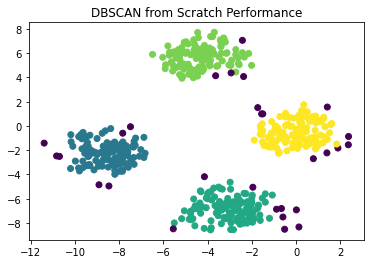

In [5]:
#grafica los puntos, aquellos de color negro son los puntos de ruido, es decir,
#puntos que no pertenecen a un cluster
plt.scatter(X_blob[:,0], X_blob[:,1], c=labels)
plt.title("DBSCAN from Scratch Performance")
plt.show()

# Conclusión

El código dado por el autor muestra lo sencillo que es implementar este algoritmo, aunque no está optimizado, pienso que no lo hace para evitar confundir al lector, ademas que en otros ejemplos utiliza las funciones ya implementadas de la libreria scipy.

Sobre el algoritmo, es muy buen algoritmo ya que además de crear los clusters, es capaz de marcar puntos que posiblemente son ruido. Dando los valores correctos del radio de vecindario es muy bueno al hacer los clusters y no es tan pesado computacionalmente como otros algoritmos.

El punto negativo que observo es que depende mucho de los hiperparámetros dados, por lo que si no se escogen adecuadamente dará malos resultados.